**실습 1**

In [ ]:
# 연산 처리를 위한 패키지
import numpy as np
import pandas as pd

# 데이터 분석을 위한 패키지
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import LabelEncoder, Binarizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder


# 시각화를 위한 패키지
import matplotlib.pyplot as plt

# 경고 메세지 무시

### Q1. Mushroom Data set  (45점)


1) 주어진 데이터 mushroom.csv 를 pandas dataframe 으로 불러온 후, mushroom으로 저장하고, head를 이용해 확인해주세요. (2점)

In [ ]:
mushroom=pd.read_csv('./mushrooms.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


2) mushroom 데이터 내에 결측치가 존재하는지 확인하세요 (3점)


In [ ]:
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**버섯 분류 모델을 위한 코드입니다.
다음 코드를 로드해주세요.**

In [ ]:
X = mushroom.drop(['class'],axis=1)
y = mushroom['class']


X = pd.get_dummies(X)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

#20%의 테스트 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# GINI계수를 사용하고,  maximum depth가 3인 분류모델 생성
clf_mush = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# 모델 학습
clf_mush.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

3) mushpred라는 변수에 clf_mush 분류모델을 사용해, X_test에 대한 예측결과를 할당하세요 (4점)


In [ ]:
mushpred = clf_mush.predict(X_test)

4) clf_mush 모델의 정확도를 알아보겠습니다  
아래 형식으로 모델의 정확도를 출력하세요 (5점)



    정확도:0.***

In [ ]:
accuracy = accuracy_score(y_test,mushpred)
print('정확도:{0:.3f}'.format(accuracy))

정확도:0.990


5) clf_mush의 예측결과인 mushpred와 실제결과인 y_test를 인자로 입력해 어레이 형태의 오차행렬을 출력하세요 (5점)



In [ ]:
confusion_matrix(y_test, mushpred)

array([[809,  11],
       [  5, 800]])

6) clf_mush모델의 정밀도와 재현율을 알아보겠습니다  
정밀도와 재현율을 구해 아래형식으로 출력하세요  (8점)

     정밀도: 0.****, 재현율: 0.****



In [ ]:
precision = precision_score(y_test, mushpred)
recall = recall_score(y_test, mushpred)

print('정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision, recall))

정밀도: 0.9864, 재현율: 0.9938


7) clf_mush 모델의 F1스코어를 알아보겠습니다  
아래 형식으로 모델의 F1스코어를 출력하세요   (5점)



    F1스코어:0.***

In [ ]:
f1=f1_score(y_test,mushpred)
print('F1스코어:{0:.3f}'.format(f1))

F1스코어:0.990


8) FPR변화에 따른 TPR의 변화를 ROC 곡선으로 시각화하세요  
그래프 옵션은 아래를 참고해주세요 (8점)

    start, end =plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()

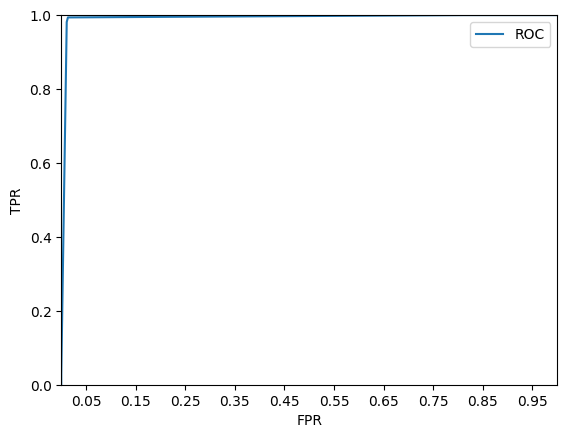

In [ ]:
pred_prob=clf_mush.predict_proba(X_test)
pred_prob_c1=clf_mush.predict_proba(X_test)[:,1]

def roc_curve_plot(y_test,pred_prob_c1):
  fprs, tprs, thresholds=roc_curve(y_test,pred_prob_c1)
  plt.plot(fprs,tprs,label='ROC')

  start, end =plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend()

roc_curve_plot(y_test,pred_prob[:,1])

9) clf_mush모델의 AUC면적을 구해 소수점 4번째자리까지 출력하세요 (5점)

In [ ]:
roc_auc = roc_auc_score(y_test,pred_prob_c1)
print('AUC: {}'.format(np.round(roc_auc,4)))

AUC: 0.9921


## Q2. Titanic Data set (40점)

** 컬럼 별 설명**

* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton



## Q2-1. titanic data set을 titanic 변수에 load하고, 데이터셋의 상위 3행과 하위 3행을 출력하세요. (3점)

In [ ]:
# titanic data_set load
titanic = pd.read_csv('./titanic.csv')


In [ ]:
# titanic data_set의 상위 3행을 출력하세요
display(titanic.head(3))

# titanic data_set의 하위 3행을 출력하세요
display(titanic.tail(3))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Q2-2. titanic 데이터의 분포도와 titanic 'Pclass'열의 데이터 분포를 확인하세요.(3점)

In [ ]:
# titanic 데이터 분포도 확인
print(titanic.describe())

# titanic 'Pclass'열의 분포도 확인
print(titanic['Pclass'].value_counts())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
3    491
1    216
2    184
Name: Pclass, dtype: int64


## Q2-3. titanic 데이터 내에 각 column마다 결측치가 몇 개씩 존재하는지 확인하고, 총 결측치의 개수 또한 구해주세요. (3점)

In [ ]:
print(titanic.isna().sum())
print('결측치 개수: {}개'.format(titanic.isna().sum().sum()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
결측치 개수: 866개


## Q2-4. 'Embarked'열의 결측치는 해당 열의 최빈값으로, 'Cabin'열의 결측치는 'NaN'으로 'Name'열의 결측치는 해당 열의 평균값으로 채워주세요. (4점)

In [ ]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['Cabin'].fillna('NaN', inplace=True)


## Q2-5. 'Sex'열이 문자로 구분되어 있기에 남자는 0, 여자는 1로 매칭시켜주세요. (2점)

In [ ]:
# Boolean index를 사용해주세요

titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1


## Q2-6. 'Embarked' 열을 이용하여 Embarked_C , Embarked_S, Embarked_Q 3개의 column을 만들고 각 column에 해당하는 값에 따라 T/F로 매칭해주세요. (4점)

ex) Embarked에 해당하는 값이 'C'이면 'Embarked_C'에 True를, 'S' 혹은 'Q'라면 False를 반환하도록 만들어주세요.

In [ ]:
titanic['Embarked_C'] = (titanic['Embarked'] == 'C')
titanic['Embarked_S'] = (titanic['Embarked'] == 'S')
titanic['Embarked_Q'] = (titanic['Embarked'] == 'Q')

## Q2-7. titanic 데이터의 shape을 구해주세요. (1점)

In [ ]:
titanic.shape


(891, 15)

## Q2-8. Decision Tree에 사용할 Feature는 'Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'입니다. train_test_split()을 이용하여 학습 데이터와 테스트 데이터로 분리해주세요. (test_size는 0.2로 설정합니다) (5점)

In [ ]:
feature_names = ['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
features = titanic[feature_names]
label = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)



In [ ]:
dt_clf = DecisionTreeClassifier(random_state=11)

## Q2-9. DecisionTreeClassifier를 이용하여 학습/예측/평가를 해주세요. (fit, predict, accuracy_score method이용) (3점)

정확도는 소수점 5번째 자리에서 반올림 해주세요.

In [ ]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('Decision Tree 정확도:', np.round(accuracy_score(pred, y_test),4))

Decision Tree 정확도: 0.8212


## Q2-10. dt_clf의 예측결과 pred와 실제 결과인 y_test를 이용하여 오차행렬을 출력하세요. (2점)

In [ ]:
confusion_matrix(pred, y_test)

array([[100,  15],
       [ 17,  47]])

## Q2-11. dt_clf의 정밀도와 재현율을 각각 소수점 5번째 자리에서 반올림하여 출력하세요. (2점)

In [ ]:
precision = precision_score(pred, y_test)
recall = recall_score(pred, y_test)

print('정밀도: {0}'.format(np.round(precision,4)))
print('재현율: {0}'.format(np.round(recall,4)))


정밀도: 0.7581
재현율: 0.7344


## Q2-12. 정밀도와 재현율 곡선을 그려주세요. (3점)

아래 코드를 먼저 실행해주세요.

In [ ]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

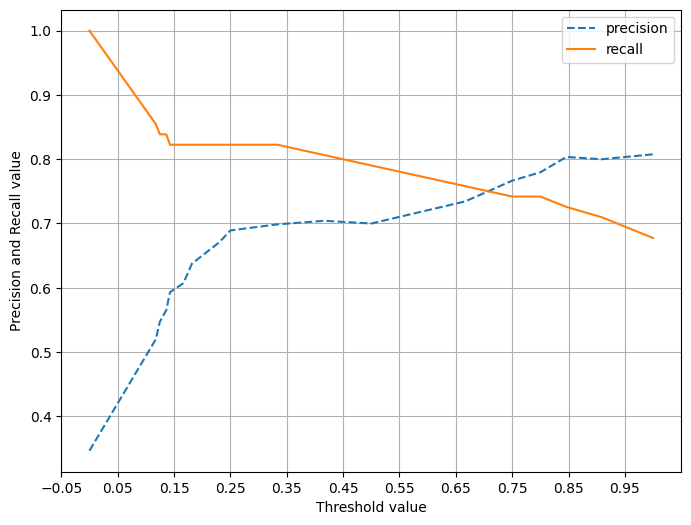

In [ ]:
pred_proba_c = dt_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c)


## Q2-13. dt_clf의 F1 Score을 소수점 5번째 자리에서 반올림하여 출력해주세요. (1점)


In [ ]:
f1 = f1_score(y_test, pred)
print('F1: {}'.format(np.round(f1,4)))

F1: 0.746


## Q2-14. dt_clf의 AUC Score을 소수점 5번째 자리에서 반올림하여 출력해주세요. (1점)

In [ ]:
roc_auc = roc_auc_score(pred, y_test)
print('AUC: {}'.format(np.round(roc_auc,4)))

AUC: 0.802


## Q2-15. graphviz를 이용하여 트리를 시각화 시켜주세요. (3점)

(class_names=['Perish', 'Survived'], out_file='tree.dot'으로 설정해주세요)

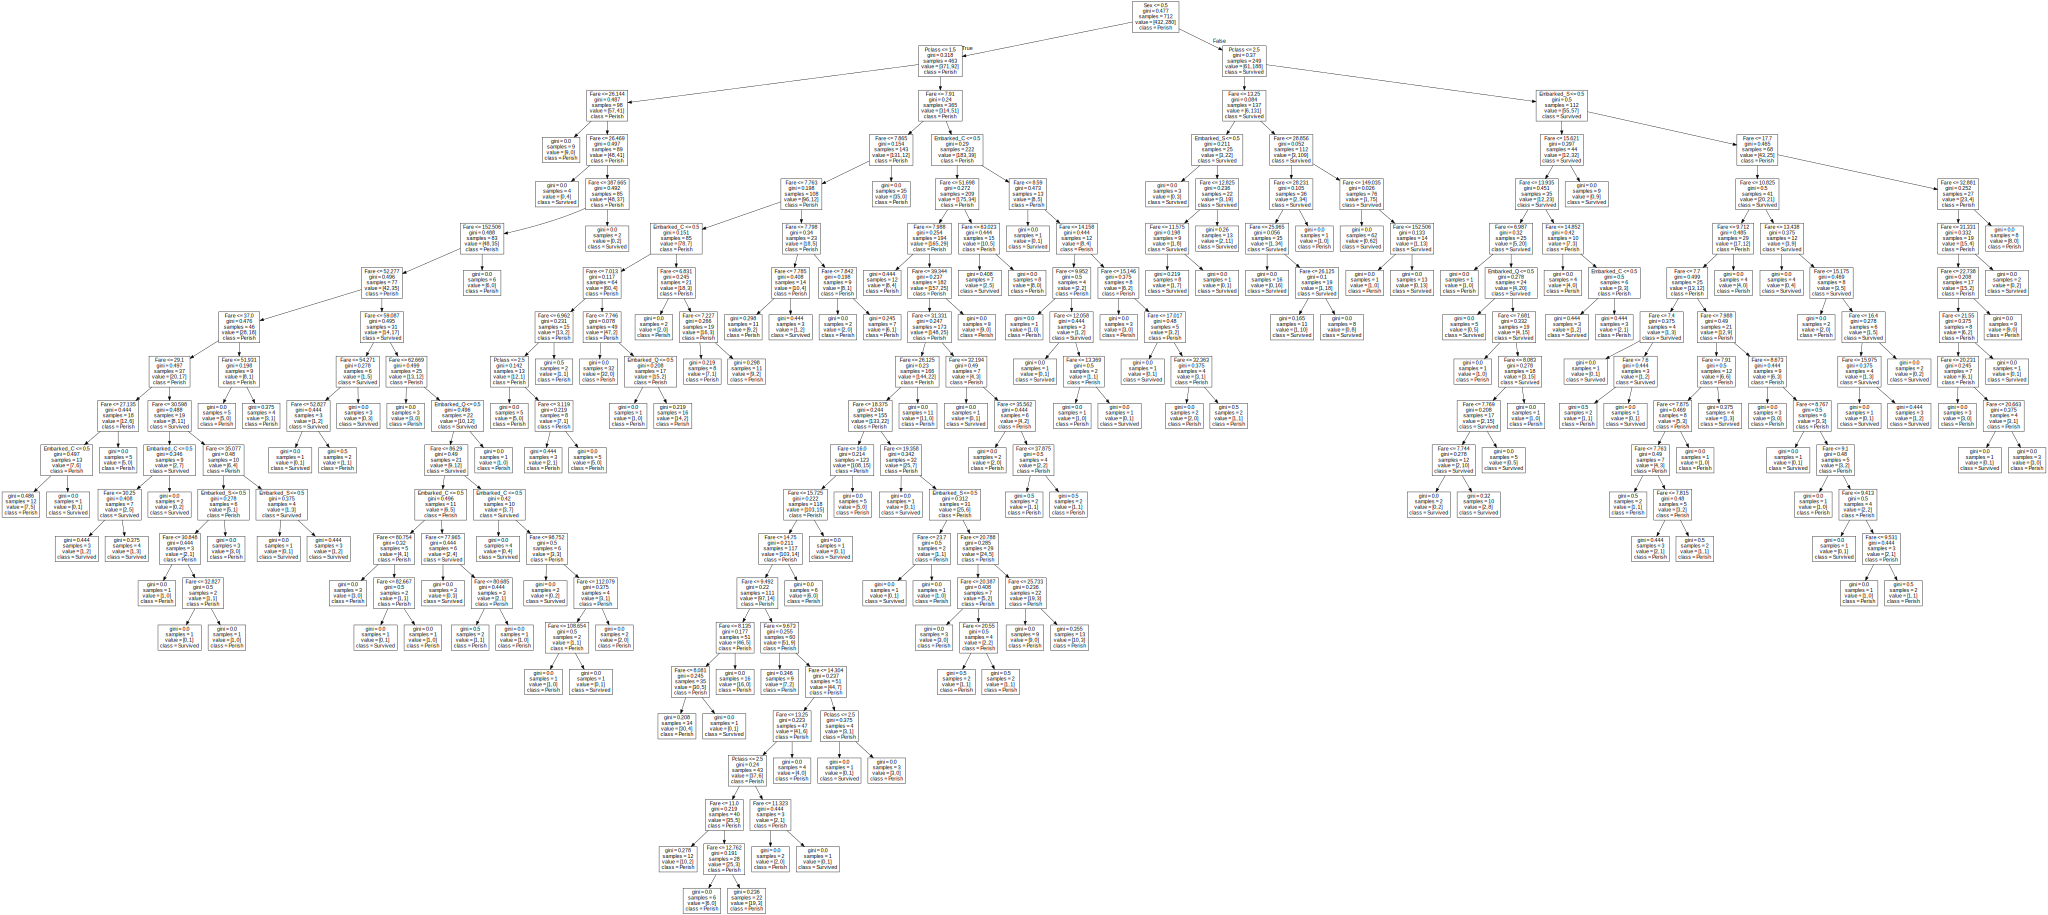

In [ ]:
import graphviz
export_graphviz(dt_clf, out_file='tree.dot', feature_names=feature_names, class_names=['Perish', 'Survived'])

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)